In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime

In [2]:
ds_currency = pd.read_csv("./환율.csv", engine='python', parse_dates=["APPL_DATE"])
ds_currency.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


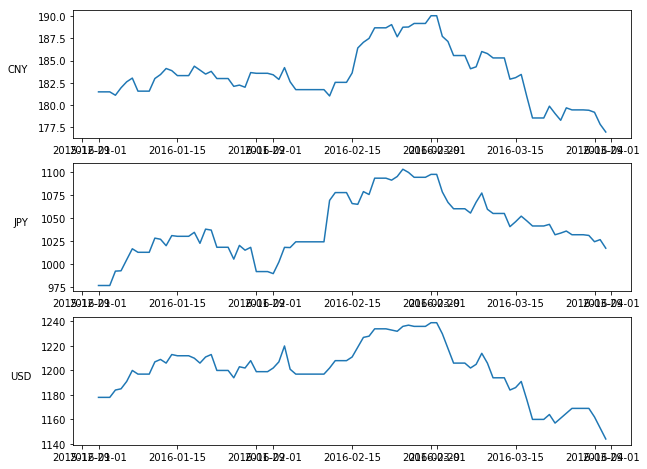

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(10,8))
for (ax, idx, currency) in zip([ax1, ax2, ax3],[311,312,313],["CNY","JPY","USD"]):
    ax.plot("APPL_DATE","STD_RATE",data=ds_currency[ds_currency["CURRENCY"] == currency])
    ax.set_ylabel(currency, rotation=0, labelpad=20)

In [4]:
ds_currency_CNY = ds_currency[ds_currency["CURRENCY"]=="CNY"].set_index("APPL_DATE")
ds_currency_CNY.drop(["CURRENCY","USD_CONV_DATE"],axis=1,inplace=True)

ds_currency_JPY = ds_currency[ds_currency["CURRENCY"]=="JPY"].set_index("APPL_DATE")
ds_currency_JPY.drop(["CURRENCY","USD_CONV_DATE"],axis=1,inplace=True)

ds_currency_USD = ds_currency[ds_currency["CURRENCY"]=="USD"].set_index("APPL_DATE")
ds_currency_USD.drop(["CURRENCY","USD_CONV_DATE"],axis=1,inplace=True)
ds_currency_CNY.head()

,STD_RATE
APPL_DATE,
2016-01-01,181.48
2016-01-02,181.48
2016-01-03,181.48
2016-01-04,181.10
2016-01-05,181.94


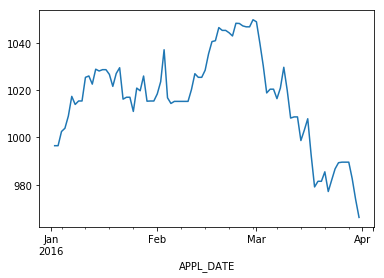

In [5]:
ds_usd_diff1 = ds_currency_USD["STD_RATE"] - ds_currency_CNY["STD_RATE"].shift(1)
ds_usd_diff1.plot()

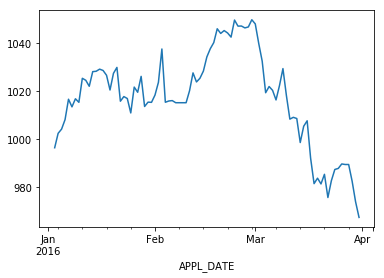

In [6]:
ds_usd_diff2 = ds_currency_USD["STD_RATE"] - (2*ds_currency_CNY["STD_RATE"].shift(1)) + (ds_currency_CNY["STD_RATE"].shift(2)) 
ds_usd_diff2.plot()

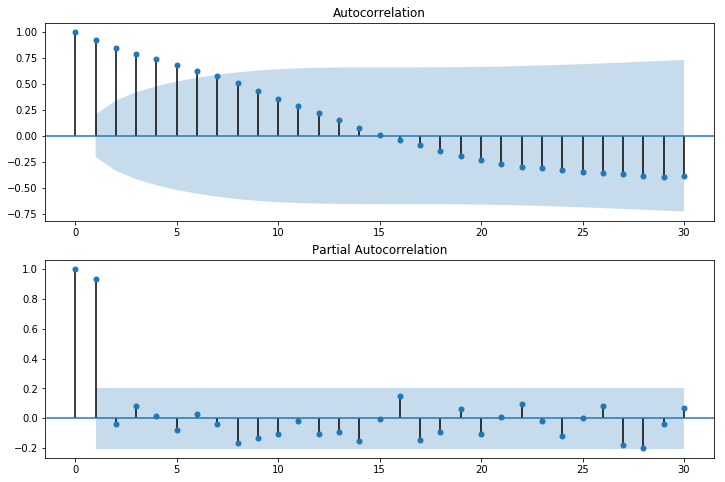

In [7]:
lag_size = 30
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(ds_currency_USD["STD_RATE"],lags=lag_size,ax=ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(ds_currency_USD["STD_RATE"],lags=lag_size, ax=ax2)

In [8]:
ts_model_usd = ARIMA(ds_currency_USD,order=(1,2,0))
ts_res_usd = ts_model_usd.fit(trend='c',full_output=True, disp=1)
print(ts_res_usd.summary())

/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/pirl/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In

                             ARIMA Model Results                              
Dep. Variable:            D2.STD_RATE   No. Observations:                   89
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -302.442
Method:                       css-mle   S.D. of innovations              7.231
Date:                Mon, 11 Feb 2019   AIC                            610.884
Time:                        17:43:31   BIC                            618.350
Sample:                    01-03-2016   HQIC                           613.893
                         - 03-31-2016                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1017      0.559     -0.182      0.856      -1.198       0.994
ar.L1.D2.STD_RATE    -0.3751      0.097     -3.853      0.000      -0.566      -0.184
                        

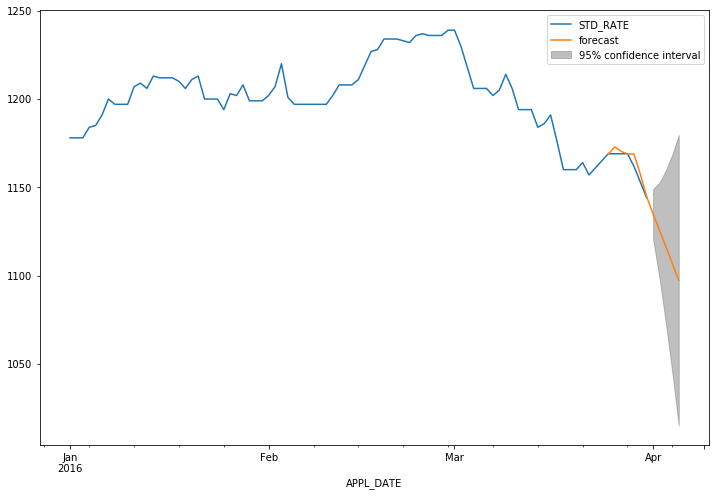

In [9]:
start_time = datetime.strptime("2016-03-25T00:00:00","%Y-%m-%dT%H:%M:%S")
end_time = datetime.strptime("2016-04-05T00:00:00","%Y-%m-%dT%H:%M:%S")
fig, ax = plt.subplots(figsize=(12,8))
ax = ds_currency_USD.plot(ax=ax)
fig = ts_res_usd.plot_predict(start=start_time, end=end_time,ax=ax,plot_insample=False)